# Ashwingupta3012 Human-faces Dataset

## Features Processing and Annotation

In [1]:
# Declare Paths
import os
import sys
TRAINING_PATH = os.path.join(
    os.path.dirname(os.path.realpath(os.curdir)),
    'human-faces',
    'versions',
    '1',
    'Humans'
)
TESTING_PATH = os.path.join(
    os.path.dirname(os.path.realpath(os.curdir)),
    'human-faces',
    'versions',
    '1',
    'Humans'
)
AI_MODEL_PATH = os.path.join(
    os.path.dirname(os.path.realpath(os.curdir)),
    '..',
    '..'
)
sys.path.append(AI_MODEL_PATH)

In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from image_preprocessing import visualize_image, preprocess, encode_labels, decode_labels
import random

## Load the Data

In [3]:
TRAIN_SIZE = 400
TEST_SIZE = 100

In [4]:
X_train = []
y_train = []
X_test = []
y_test = []

# Training Data
count = 0
for imageName in os.listdir(TRAINING_PATH):
    filename = os.path.join(TRAINING_PATH, imageName)
    try: 
        image = cv2.imread(filename)
    except:
        print(f'Error reading file: {filename}')
        break
    X_train.append(image)
    y_train.append('Human')
    count += 1
    if count >= TRAIN_SIZE:
        break

# Testing Data
count = 0
for imageName in os.listdir(TESTING_PATH):
    filename = os.path.join(TESTING_PATH, imageName)
    try: 
        image = cv2.imread(filename)
    except:
        print(f'Error reading file: {filename}')
        break
    X_test.append(image)
    y_test.append('Human')
    count += 1
    if count >= TEST_SIZE:
        break

Before Processing...
Training Set


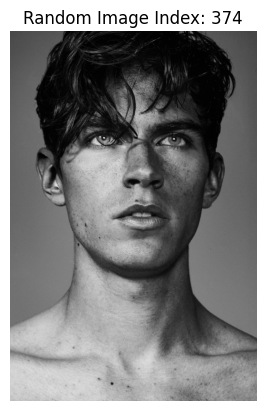

Testing Set


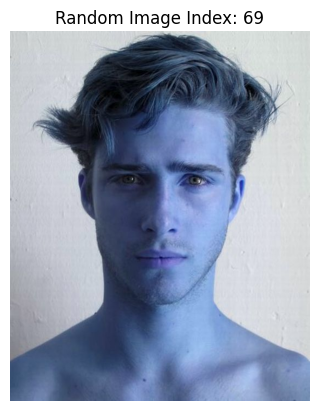

In [5]:
# Visualizing
# Since Each Raw Image has ambiguous resolutions, we need to resize them manually.
print("Before Processing...")
# Train
random_index_X_train = random.randint(0, len(X_train)-1)
random_image_train = X_train[random_index_X_train]

print("Training Set")
plt.imshow(random_image_train)
plt.title(f'Random Image Index: {random_index_X_train}')
plt.axis('off')
plt.show()

# Test
random_index_X_test = random.randint(0, len(X_test)-1)
random_image_test = X_test[random_index_X_test]

print("Testing Set")
plt.imshow(random_image_test)
plt.title(f'Random Image Index: {random_index_X_test}')
plt.axis('off')
plt.show()

In [6]:
print(f"Length of Training Set: {len(X_train)}")
print(f"Length of Testing Set: {len(X_test)}")
assert len(X_train) == len(y_train) == TRAIN_SIZE
assert len(X_test) == len(y_test) == TEST_SIZE

Length of Training Set: 400
Length of Testing Set: 100


In [7]:
print(f"Shape of an Image: {X_train[0].shape}")

Shape of an Image: (1600, 1066, 3)


Seems like it is an image in 1600 x 1066 pixels with RGB.

## Preprocess the Images Data

In [8]:
X_train_processed = []
X_test_processed = []

# Train Set
for image in X_train:
    processed_image = preprocess(
        img_array=image,
        isCurrentGrayScale=False
    )
    X_train_processed.append(processed_image)

# Test Set
for image in X_test:
    processed_image = preprocess(
        img_array=image,
        isCurrentGrayScale=False
    )
    X_test_processed.append(processed_image)

In [10]:
X_train_processed = np.array(X_train_processed)
X_test_processed = np.array(X_test_processed)

After Processing...


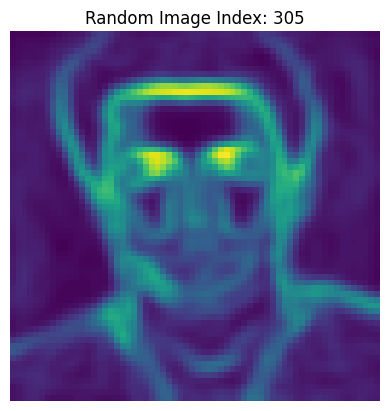

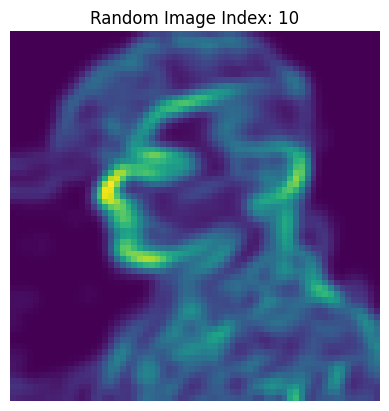

In [11]:
print(f"After Processing...")
# Train
visualize_image(X_train_processed)
# Test
visualize_image(X_test_processed)

In [17]:
# Encoding Labels
y_train_encoded, encoder_train = encode_labels(y_train)
y_test_encoded, encoder_test = encode_labels(y_test)
# Print Unique Encoded Labels
print(f"Unique Encoded Labels in Training Set: {list(set(list(y_train_encoded)))}")
print(f"Unique Encoded Labels in Test Set: {list(set(list(y_test_encoded)))}")
# Assert with decoded labelings
assert np.array_equal(y_train, decode_labels(y_train_encoded, encoder_train))
assert np.array_equal(y_test, decode_labels(y_test_encoded, encoder_test))

Unique Encoded Labels in Training Set: [np.int64(0)]
Unique Encoded Labels in Test Set: [np.int64(0)]


In [22]:
assert len(X_train_processed) == len(X_train) == len(y_train) == len(y_train_encoded) == TRAIN_SIZE
assert len(X_test_processed) == len(X_test) == len(y_test) == len(y_test_encoded) == TEST_SIZE

In [23]:
# Save Processed Data
if not (os.path.exists('features')):
    os.makedirs('features')
if not (os.path.exists('labels')):
    os.makedirs('labels')
if not (os.path.exists('encoders')):
    os.makedirs('encoders')

np.save('features/X_train.npy', X_train_processed)
np.save('features/X_test.npy', X_test_processed)
np.save('labels/y_train.npy', y_train_encoded)
np.save('labels/y_test.npy', y_test_encoded)
np.save('encoders/encoder_train.npy', encoder_train)
np.save('encoders/encoder_test.npy', encoder_test)
print("Data Saved Successfully!")

Data Saved Successfully!
